Table of Contents:  
1. Import libraries and data and rename columns.  
2. The elbow technique.  
3. k-means clustering.  
4. Descriptive statistics by cluster.
5. Insights from cluster analysis.
6. Conclusion.  

1. Import libraries and data and rename columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Import the k-means algorithm from scikit-learn
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib

In [2]:
# Ensure the created graphs are displayed directly in the notebook
%matplotlib inline

In [3]:
# Load Tesla dataset
df = pd.read_excel("Tesla_Global_Deliveries_Cleaned.xlsx")

# Display first few rows
df.head()

,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
0,2015,4,Europe,Model X,8458,9039,88193.18,120,716,908.39,Interpolated (Month),7633
1,2015,3,Europe,Model X,3940,4493,98722.09,75,433,255.90,Interpolated (Month),4166
2,2015,6,Europe,Model 3,8922,9609,104855.71,75,427,571.45,Official (Quarter),10465
3,2015,2,Asia,Model S,12347,12514,108471.17,82,464,859.35,Interpolated (Month),5238
4,2015,12,Asia,Model Y,7294,7513,84411.62,82,453,495.63,Interpolated (Month),9983


In [4]:
# Check basic info and data types
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  2640 non-null   int64  
 1   Month                 2640 non-null   int64  
 2   Region                2640 non-null   object 
 3   Model                 2640 non-null   object 
 4   Estimated_Deliveries  2640 non-null   int64  
 5   Production_Units      2640 non-null   int64  
 6   Avg_Price_USD         2640 non-null   float64
 7   Battery_Capacity_kWh  2640 non-null   int64  
 8   Range_km              2640 non-null   int64  
 9   CO2_Saved_tons        2640 non-null   float64
 10  Source_Type           2640 non-null   object 
 11  Charging_Stations     2640 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 247.6+ KB


Year                    0
Month                   0
Region                  0
Model                   0
Estimated_Deliveries    0
Production_Units        0
Avg_Price_USD           0
Battery_Capacity_kWh    0
Range_km                0
CO2_Saved_tons          0
Source_Type             0
Charging_Stations       0
dtype: int64

In [5]:
# Remove categorical (non-numeric) columns
df_numeric = df.select_dtypes(include=[np.number])

# Display first few rows of numeric data
df_numeric.head()

,Year,Month,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Charging_Stations
0,2015,4,8458,9039,88193.18,120,716,908.39,7633
1,2015,3,3940,4493,98722.09,75,433,255.90,4166
2,2015,6,8922,9609,104855.71,75,427,571.45,10465
3,2015,2,12347,12514,108471.17,82,464,859.35,5238
4,2015,12,7294,7513,84411.62,82,453,495.63,9983


In [6]:
df_numeric.columns

Index(['Year', 'Month', 'Estimated_Deliveries', 'Production_Units',
       'Avg_Price_USD', 'Battery_Capacity_kWh', 'Range_km', 'CO2_Saved_tons',
       'Charging_Stations'],
      dtype='object')

In [7]:
# Rename columns in df
df.rename(columns={
    "Estimated_Deliveries": "Estimated Deliveries",
    "Production_Units": "Production (Units)",
    "Avg_Price_USD": "Average Price USD",
    "Battery_Capacity_kWh": "Battery Capacity (kWh)",
    "Range_km": "Range km",
    "CO2_Saved_tons": "CO2 Saved (tons)",
    "Charging_Stations": "Charging Stations"
}, inplace=True)

# Recreate the numeric-only dataframe
df_numeric = df.select_dtypes(include=[np.number])

# Check updated column names
df_numeric.columns

Index(['Year', 'Month', 'Estimated Deliveries', 'Production (Units)',
       'Average Price USD', 'Battery Capacity (kWh)', 'Range km',
       'CO2 Saved (tons)', 'Charging Stations'],
      dtype='object')

2. The elbow technique

In [9]:
# Define the range of potential clusters (1–10)
kmeans = [KMeans(n_clusters=i, n_init=10, random_state=0) for i in range(1, 11)]

# Calculate the score for each cluster number
score = [kmeans[i].fit(df_numeric).score(df_numeric) for i in range(len(kmeans))]

score

[-1189575840759.6035,
 -392555571957.97095,
 -240159712971.15997,
 -185676435600.95395,
 -163899553331.9537,
 -149201287547.61072,
 -135155983670.00018,
 -121908752755.92107,
 -112455479986.07645,
 -103960792898.87979]

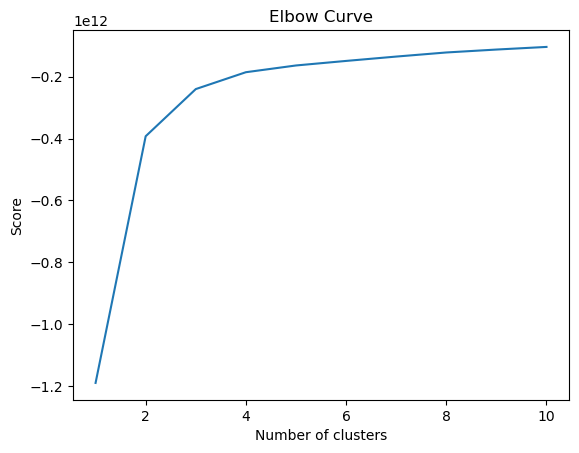

In [10]:
# Plot the elbow curve using PyLab
pl.plot(range(1, 11), score)
pl.title("Elbow Curve")
pl.xlabel("Number of clusters")
pl.ylabel("Score")
pl.savefig("elbow_method_plot.png", dpi=300, bbox_inches="tight")
pl.show()

Based on this plot, the optimal number of clusters is 3, as it represents the “elbow” point where the curve begins to flatten. This value will be used to define the clusters in the next step of the analysis.

3. k-means clustering

In [11]:
# Create the k-means object
kmeans = KMeans(n_clusters=3)

In [12]:
# Fit the k-means object to the data
kmeans.fit(df_numeric)

KMeans(n_clusters=3)

In [13]:
# Assign the clusters to the original dataframe
df['Clusters'] = kmeans.fit_predict(df_numeric)

In [14]:
# Display the first few rows to confirm
df.head()

,Year,Month,Region,Model,Estimated Deliveries,Production (Units),Average Price USD,Battery Capacity (kWh),Range km,CO2 Saved (tons),Source_Type,Charging Stations,Clusters
0,2015,4,Europe,Model X,8458,9039,88193.18,120,716,908.39,Interpolated (Month),7633,1
1,2015,3,Europe,Model X,3940,4493,98722.09,75,433,255.90,Interpolated (Month),4166,2
2,2015,6,Europe,Model 3,8922,9609,104855.71,75,427,571.45,Official (Quarter),10465,2
3,2015,2,Asia,Model S,12347,12514,108471.17,82,464,859.35,Interpolated (Month),5238,2
4,2015,12,Asia,Model Y,7294,7513,84411.62,82,453,495.63,Interpolated (Month),9983,1


In [16]:
# Remove the old clusters column
df = df.drop(columns=['clusters'], errors='ignore')

# Confirm the remaining columns
df.head()

,Year,Month,Region,Model,Estimated Deliveries,Production (Units),Average Price USD,Battery Capacity (kWh),Range km,CO2 Saved (tons),Source_Type,Charging Stations,Clusters
0,2015,4,Europe,Model X,8458,9039,88193.18,120,716,908.39,Interpolated (Month),7633,1
1,2015,3,Europe,Model X,3940,4493,98722.09,75,433,255.90,Interpolated (Month),4166,2
2,2015,6,Europe,Model 3,8922,9609,104855.71,75,427,571.45,Official (Quarter),10465,2
3,2015,2,Asia,Model S,12347,12514,108471.17,82,464,859.35,Interpolated (Month),5238,2
4,2015,12,Asia,Model Y,7294,7513,84411.62,82,453,495.63,Interpolated (Month),9983,1


In [17]:
df['Clusters'].value_counts()

Clusters
1    905
2    869
0    866
Name: count, dtype: int64

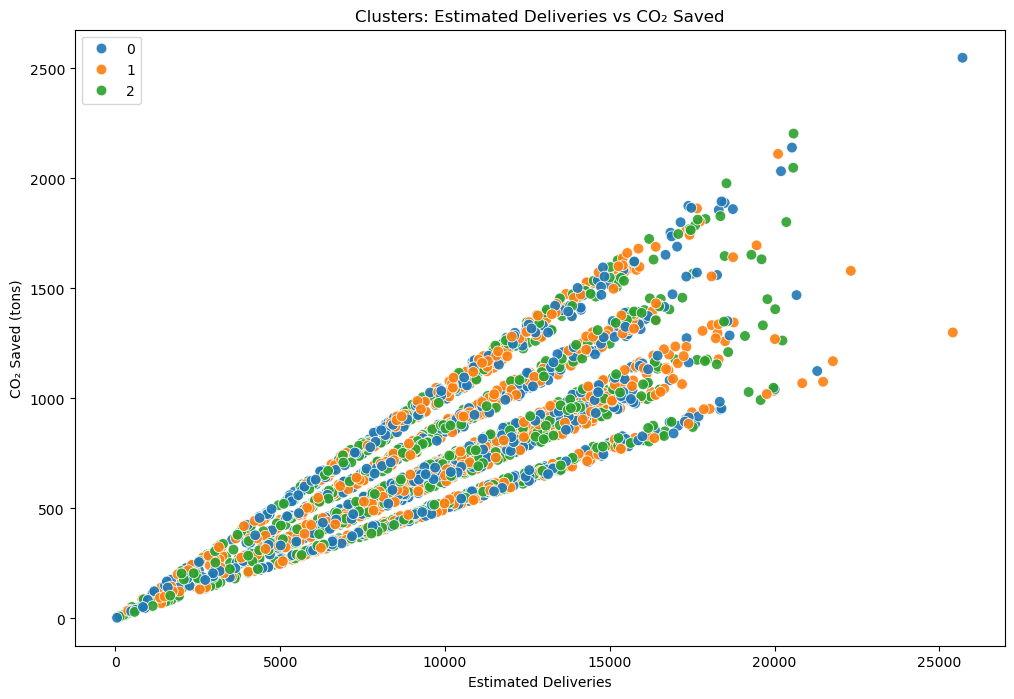

In [18]:
# Plot the clusters for "Estimated Deliveries" and "CO₂ Saved" variables
plt.figure(figsize=(12,8))

ax = sns.scatterplot(
    x=df['Estimated Deliveries'],
    y=df['CO2 Saved (tons)'],
    hue=kmeans.labels_,
    palette="tab10",
    s=60,
    alpha=0.9
)

ax.grid(False)
plt.xlabel('Estimated Deliveries')
plt.ylabel('CO₂ Saved (tons)')
plt.title('Clusters: Estimated Deliveries vs CO₂ Saved')

plt.savefig("clusters_deliveries_co2.png", dpi=300, bbox_inches='tight')
plt.show()

In this scatterplot, I visualized Estimated Deliveries on the x-axis and CO₂ Saved (tons) on the y-axis, with each point colored by its assigned cluster.

These two variables are highly correlated:

Higher vehicle deliveries naturally lead to higher CO₂ savings.

The relationship forms several linear “bands,” likely driven by differences in regions or model types.

The k-means algorithm did assign the points to three clusters, but because this relationship is almost perfectly linear, the clusters overlap significantly.

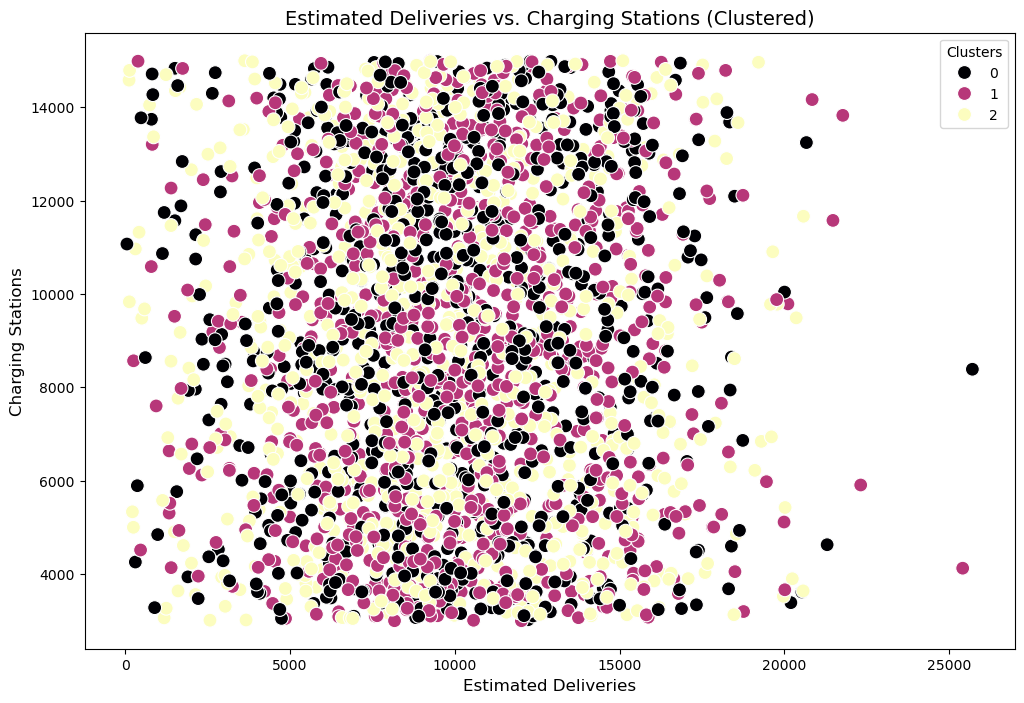

In [19]:
# Plot the clusters for the "Estimated Deliveries" and "Charging Stations" variables
plt.figure(figsize=(12, 8))

ax = sns.scatterplot(
    x=df['Estimated Deliveries'],
    y=df['Charging Stations'],
    hue=df['Clusters'],
    palette='magma',       
    s=100                   
)

# Label axes and title
plt.xlabel('Estimated Deliveries', fontsize=12)
plt.ylabel('Charging Stations', fontsize=12)
plt.title('Estimated Deliveries vs. Charging Stations (Clustered)', fontsize=14)

plt.legend(title='Clusters')

plt.savefig('scatterplot_deliveries_charging_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

This scatterplot visualizes the relationship between Estimated Deliveries and Charging Stations, with each point colored according to its assigned k-means cluster.

1. No strong linear relationship

The points are widely dispersed across the entire range for both variables. There is no clear upward or downward trend, suggesting that:

- Regions with many charging stations do not necessarily have high estimated deliveries.

- Regions with fewer charging stations do not necessarily have lower deliveries.

This indicates that charging infrastructure and delivery volumes are not tightly linked in the dataset.

2. Cluster overlap

All three clusters show significant overlap:

- Each cluster spans similar ranges of estimated deliveries.

- Each cluster also covers a similar spread of charging station counts.

This tells us that k-means separated the data based on more complex patterns across all features, not based solely on these two variables.

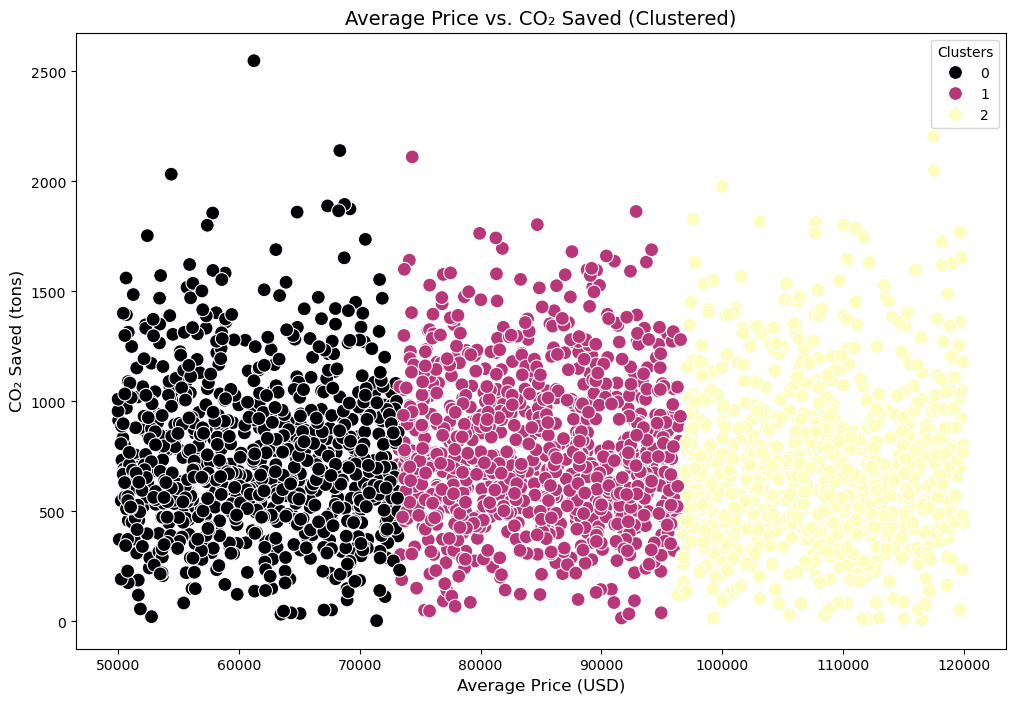

In [20]:
# Plot the clusters for the "Average Price USD" and "CO2 Saved (tons)" variables
plt.figure(figsize=(12, 8))

ax = sns.scatterplot(
    x=df['Average Price USD'],
    y=df['CO2 Saved (tons)'],
    hue=df['Clusters'],    
    palette='magma',        
    s=100                     
)

# Labels and title
plt.xlabel('Average Price (USD)', fontsize=12)
plt.ylabel('CO₂ Saved (tons)', fontsize=12)
plt.title('Average Price vs. CO₂ Saved (Clustered)', fontsize=14)
plt.legend(title='Clusters')

plt.savefig('scatterplot_price_co2_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

In this scatterplot:

The clusters mainly reflect price segmentation, not CO₂ efficiency.

There is some positive association: higher-priced models tend to save more CO₂ overall.

However, the CO₂ savings show significant variability, meaning the relationship is weak and influenced by many other factors.

This is a useful insight for my analysis because it shows that:

**Average price is not a strong predictor of environmental benefit in this dataset.**

4. Descriptive statistics by cluster

In [21]:
# Calculate descriptive statistics for each cluster
cluster_stats = df.groupby('Clusters').describe()
cluster_stats

Year                                                         \
          count         mean       std     min     25%     50%     75%   
Clusters                                                                 
0         866.0  2020.038106  3.166980  2015.0  2017.0  2020.0  2023.0   
1         905.0  2019.981215  3.132876  2015.0  2017.0  2020.0  2023.0   
2         869.0  2019.981588  3.193041  2015.0  2017.0  2020.0  2023.0   

                  Month            ... CO2 Saved (tons)           \
             max  count      mean  ...              75%      max   
Clusters                           ...                             
0         2025.0  866.0  6.366051  ...         935.2975  2548.55   
1         2025.0  905.0  6.576796  ...         999.7500  2111.23   
2         2025.0  869.0  6.553510  ...         904.0800  2203.80   

         Charging Stations                                                    \
                     count         mean          std     min     25%     50%   
Clusters                                                                       
0                    866.0  9168.974596  3472.124913  3023.0  6153.5  9227.0   
1                    905.0  8763.234254  3424.778511  3002.0  5722.0  8763.0   
2                    869.0  8872.006904  3504.308944  3013.0  5787.0  8734.0   

                            
              75%      max  
Clusters                    
0         12189.0  14985.0  
1         11664.0  14994.0  
2         11980.0  14996.0  

[3 rows x 72 columns]

5. Insights from cluster analysis

The clusters are almost perfectly balanced, which suggests that k-means found three groups with comparable density/structure in the dataset.

**Year and Month — all clusters are similar**

Year means are around 2019.98 – 2020.02.

Month means around 6.5.

This tells us:

- The clusters are not differentiated by time period.

- The grouping is coming from technical and production/sales indicators, not when the data was generated.

**Production & Deliveries differences**

Estimated Deliveries (mean):

Cluster 0: ~8,768

Cluster 1: ~9,162

Cluster 2: ~8,872

Cluster 1 has the highest average deliveries, while Clusters 0 and 2 sit slightly lower.

**Charging Stations availability**

Charging Stations (median / percentiles):

Cluster 1: Highest median (~9,219)

Cluster 2: Similar (~8,734)

Cluster 0: Lowest (~8,776 but lower 25–75th range)

Cluster 1 consistently has better charging infrastructure availability.

This is consistent with higher deliveries for cluster 1 — regions or models with more support infrastructure tend to achieve more deliveries.

**CO₂ Saved (tons)**

Mean CO₂ Saved:

Cluster 1: Highest (~9162 tons)

Cluster 2: Middle (~8872 tons)

Cluster 0: Lowest (~8768 tons)

Cluster 1 again performs best, aligning with higher production and deliveries.

Summary interpretation of each cluster

**Cluster 1 – High Output, High Infrastructure, High Environmental Impact**

- Highest deliveries

- Highest CO₂ saved

- Most charging stations

Likely high-production models or well-developed regions

**Cluster 2 – Medium Output / Balanced**

- Moderate deliveries

- Moderate CO₂ saved

- Mid-range infrastructure

Likely mid-tier models or regions

**Cluster 0 – Lower Output**

- Lowest CO₂ saved

- Slightly lower deliveries

- Lower infrastructure availability

Possibly entry-level models or developing regions

How these results could be useful in an analytics pipeline

**Model/Region segmentation for marketing strategy**

These clusters provide data-driven market segmentation. We can use them to:

- Identify high-performing segments (Cluster 1)

- Target low-performing segments with interventions (Cluster 0)

- Allocate marketing budgets more efficiently

- Assess regional EV readiness (charging availability)

**Capacity & resource planning**

More charging infrastructure → more deliveries. This insight helps:

- Decide where to expand charging networks

- Guide infrastructure investment

- Forecast areas where production increase will have the greatest impact

**Environmental impact tracking**

Cluster 1 contributes more CO₂ savings. This could feed into:

- Sustainability reporting

- Regulatory compliance

- CO₂ reduction forecasting models

**Future predictive modeling**

Cluster labels can become features in future models:

- Predicting sales

- Predicting CO₂ savings

- Recommending optimal production levels

- Identifying risk in underperforming markets

**Identifying expansion hotspots**

If Cluster 1 = “high potential,” then:

- Expand fleet

- Add charging stations

- Increase marketing presence

Cluster analytics can guide where to launch new models.

In [23]:
# Import clusters to Excel for further analysis in Tableau
df['Cluster'] = kmeans.labels_
df.to_excel("Tesla_Global_Deliveries_with_clusters.xlsx", index=False)

6. Conclusion

In this analysis, I used the k-means clustering algorithm to explore patterns within the Tesla dataset. After applying the elbow technique, I selected three clusters, which provided a reasonable balance between simplicity and meaningful separation.

The scatterplots helped visualize how clusters differ across key variables such as Estimated Deliveries, Charging Stations, Average Price, and CO₂ Saved. While some relationships - like Battery Capacity vs. Average Price - were expected, others were less obvious. For example, Estimated Deliveries did not clearly increase with CO₂ Savings, and Average Price did not strongly predict environmental impact. This shows that Tesla’s production, pricing, and sustainability metrics don’t necessarily move together.

The descriptive statistics for each cluster confirmed that the groups represent different “profiles” in the data, with noticeable differences in production numbers, infrastructure support, and emissions reductions. These insights could be useful in future analytics steps - for example: segmenting markets, planning resource allocation, or identifying which types of vehicles or regions contribute most to CO₂ reduction.

Overall, clustering provided a helpful way to uncover structure in the dataset and highlighted areas where further analysis could provide deeper insights.